# Women's presence on Wikipedia: A comprehensive analysis on the evolution of women's recognition over time, country and ethnicity.

## Abstract
In the recent century, in a lot of countries, women have finally gained more rights and we have been continuously progressing towards a more equal society. Our goal in this project is to try to highlight the evolution of social gender inequalities in different domains through the ages. Our interest is on the achievements and recognition of the work done by women in different fields as far back as the data goes. We will use the data from Wikipedia and gather data on number of women referenced, their contribution to their domain, and other parameters and compare it with the same data for men. We will also try to find how the country of origin and the time of acquisition of the rights has an significant impact.

## Research questions
Can we accurately use wikipedia database to show the gender inequalities through time?

Are there any evidence that the men/women equality is reached?

What are the domains in which there is more/less equality? Does this change according to regions/country/language?

What is the effect of women empowering events: Right to work, Sufragettes, War effort, ...?

Since some countries have delayed women's rights, is the evolution similar, in term of timeframe, extent?

## Datasets
For this project, we used the [wikidata](https://dumps.wikimedia.org/wikidatawiki/entities/) dataset which repertoriates the data from every Wikipedia article. It is stored in the form of a JSON data dump where the top level structure is organised as folows:
 - id
 - type
 - labels
 - descriptions
 - aliases
 - claims
 - sitelinks
 - lastrevid
 - modified
 
Here we are only interested in keeping some of the properties for every article, mainly the `instance of`, `sex or gender`, `field of work`, `country of origin` and `date of birth`. From this we will make our analysis and conclude.
 
 
To have an easier time visualizing the data at first, we used the [WHGI](http://whgi.wmflabs.org/). This is based on the wikidata JSON file and updated weekly. This data is stored in the form of a `.csv` and contains information about the ethnicity, field of work and times of death/birth divided into different genders. For our analysis, we are only interested in comparing data for the two most frequent genders: male and female.
 
As an extra comparaison tool, we also used the [UN population data](https://population.un.org/wpp/Download/Standard/Population/) that stores a lot of info about the population of each country in gender and age groups. This data only goes back to 1960 but can still be usefull for recentcomparaison.


## Code

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
%matplotlib inline

import findspark
findspark.init()

from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql.functions import min
import pyspark.sql.functions as F

from pyspark.sql import SparkSession
from pyspark import SparkContext

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [38]:
DATA_PATH = "data/"

In [39]:
# Creates a list of all the files in the data folder
files = [i for i in os.listdir(DATA_PATH) if i.endswith('.csv')]

# Creates a dist with all the data in data frames
d = dict((f[:-4], pd.read_csv(os.path.join(DATA_PATH, f))) for f in files)

In [40]:
dob = d['dateofbirth'].rename(columns={'Unnamed: 0': 'year'}).set_index('year')
dod = d['dateofdeath'].rename(columns={'Unnamed: 0': 'year'}).set_index('year')
dob.head()

,no gender,transgender female,intersex,fa'afafine,transgender,transgender male,female creature,male creature,woman,genderqueer,female,male,kathoey,man
year,,,,,,,,,,,,,,
-4203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
-3300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
-3200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
-3102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
-3075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [41]:
dob.drop(dob[dob.index > 2018].index, axis=0, inplace=True)
dob.drop(dob[dob.index < 1700].index, axis=0, inplace=True)
dob.describe()
dod.drop(dod[dod.index > 2018].index, axis=0, inplace=True)
dod.drop(dod[dod.index < 1700].index, axis=0, inplace=True)

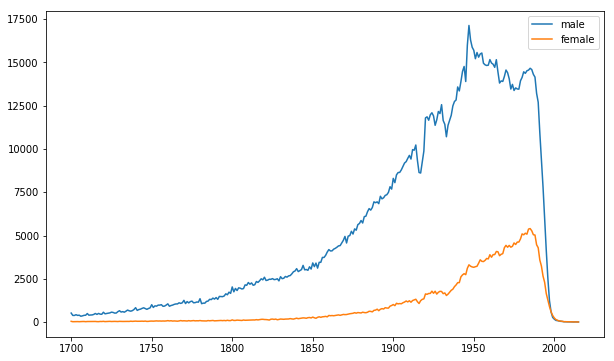

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(dob.index, dob['male'], dob.index, dob['female'])
plt.legend(['male', 'female'])

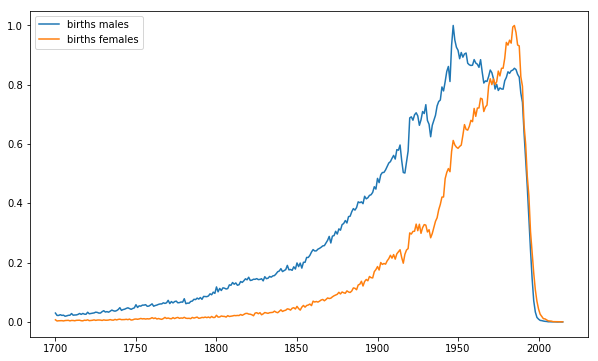

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(dob.index, dob['male'].apply(lambda r: r/dob.male.max()), 
         dob.index, dob['female'].apply(lambda r: r/dob.female.max()))

plt.legend(['births males', 'births females'])


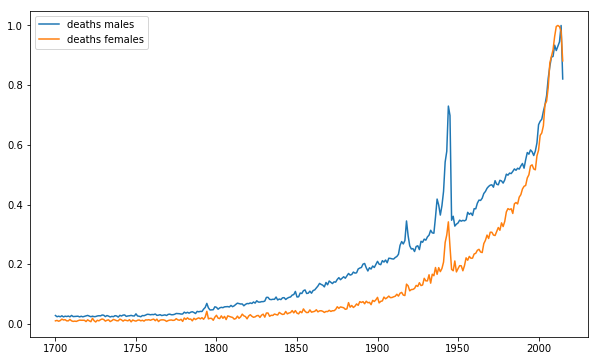

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(dod.index, dod['male'].apply(lambda r: r/dod.male.max()), 
         dod.index, dod['female'].apply(lambda r: r/dod.female.max()))

plt.legend(['deaths males', 'deaths females'])

In [45]:
def counts(df):
    """
    Counts the sum of the values in a row
    """
    return df.iloc[1:].fillna(0).sum()

In [46]:
ethnicity = d['ethnicgroups'].iloc[1:]
ethnicity['counts'] = ethnicity.apply(lambda r: counts(r), axis=1)
ethnicity.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,no gender,transgender female,intersex,fa'afafine,transgender,transgender male,female creature,male creature,woman,genderqueer,female,male,kathoey,man,counts
1,Chinese Singaporean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0
2,Hindu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0
3,Ainu people,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
4,Apache,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
5,Sephardi Jews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,9.0,NaN,NaN,12.0


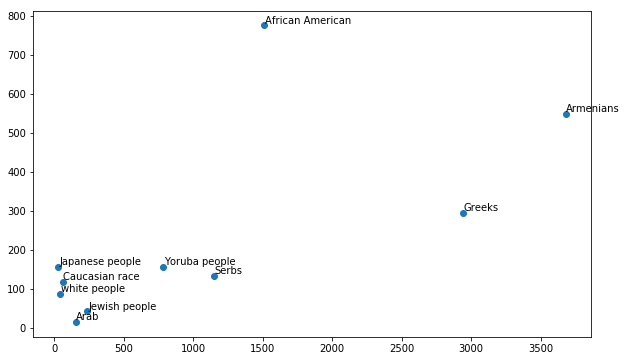

In [47]:
eth_plt = ethnicity.sort_values(by='counts', ascending=False)
eth_plt.rename(columns={'Unnamed: 0': 'ethnicity'}, inplace=True)
eth_plt = eth_plt[['ethnicity', 'female', 'male', 'counts']]

plt.figure(1, figsize=(10, 6))
plt.scatter(eth_plt.male[:10], eth_plt.female[:10])
maxpt = 10
for i in range(maxpt):
    plt.annotate(eth_plt.ethnicity.iloc[i], xy=(eth_plt.male.iloc[i]+5, eth_plt.female.iloc[i]+5))

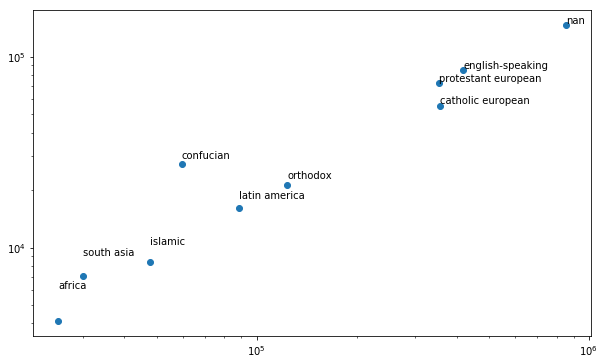

In [48]:
culture = d['culture']
culture.rename(columns={'Unnamed: 0': 'culture'}, inplace=True)

plt.figure(2, figsize=(10, 6))
plt.scatter(culture.male, culture.female)
maxpt = 10
for i in range(maxpt):
    plt.annotate(culture.culture.iloc[i], xy=(culture.male.iloc[i], culture.female.iloc[i]+2000))
    
plt.xscale('log'); plt.yscale('log')

In [49]:
birthplace = d['placeofbirth'].rename(columns={'Unnamed: 0':'city'})
birthplace['counts'] = birthplace.apply(lambda r: counts(r), axis=1)
birthplace = birthplace.sort_values(by='counts', ascending=False)

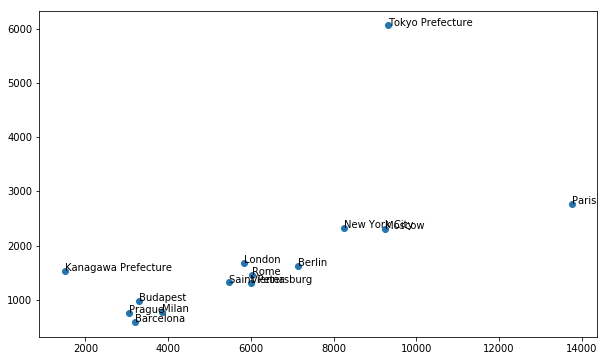

In [50]:
plt.figure(3, figsize=(10, 6))
plt.scatter(birthplace.male[1:15], birthplace.female[1:15])
maxpt = 15
for i in range(1, maxpt):
    plt.annotate(birthplace.city.iloc[i], xy=(birthplace.male.iloc[i], birthplace.female.iloc[i]))

In [51]:
def get_language_code(s): 
    try:
        return s[:-4]
    except:
        return None

def fm_ratio(df):
    return

language = d['wikipedialanguage'].rename(columns={'Unnamed: 0':'language'})
language.sort_values(by='male', ascending=False, inplace=True)
language['language'] = language['language'].apply(lambda r: get_language_code(r))
language.head(20)

,language,no gender,transgender female,intersex,fa'afafine,transgender,transgender male,female creature,male creature,woman,genderqueer,female,male,kathoey,man
98,en,1270.0,120.0,20.0,1.0,NaN,31.0,1.0,NaN,NaN,18.0,210465.0,1109855,1.0,NaN
83,de,50.0,31.0,1.0,1.0,NaN,12.0,NaN,NaN,NaN,4.0,89350.0,501359,1.0,NaN
133,fr,28.0,39.0,3.0,1.0,1.0,7.0,1.0,NaN,NaN,4.0,70957.0,386016,NaN,NaN
339,ru,871.0,29.0,2.0,NaN,NaN,6.0,NaN,NaN,NaN,1.0,42270.0,266020,1.0,NaN
192,it,151.0,32.0,2.0,1.0,NaN,6.0,2.0,NaN,NaN,1.0,42822.0,252366,NaN,NaN
313,pl,190.0,17.0,NaN,NaN,NaN,3.0,1.0,NaN,NaN,1.0,42767.0,235250,NaN,NaN
108,es,58.0,43.0,4.0,1.0,NaN,8.0,1.0,NaN,NaN,2.0,45592.0,225611,NaN,NaN
198,ja,55596.0,21.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,46435.0,165280,1.0,NaN
284,nl,26.0,15.0,1.0,NaN,NaN,3.0,1.0,NaN,NaN,3.0,28826.0,150438,NaN,NaN
383,sv,43.0,21.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,1.0,35941.0,145310,NaN,NaN


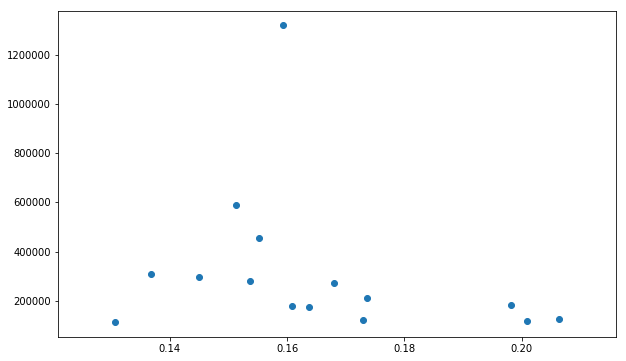

In [52]:
maxpt = 15
plt.figure(3, figsize=(10, 6))
plt.scatter(language.female[:maxpt]/(language.iloc[:maxpt, 1:].sum(axis=1)), 
            (language.female[:maxpt].values+language.male[:maxpt].values))
maxpt = 15
# for i in range(0, maxpt):
#     plt.annotate(language.language.iloc[i], xy=(language.male.iloc[i], language.female.iloc[i]+2e3))

In [53]:
wpop = pd.read_csv('wpop.tsv', sep='\t')

FileNotFoundError: File b'wpop.tsv' does not exist

In [54]:
def clean_year(s):
    try:
        if s.endswith('BC') :
            return -int(s[:-3])
        elif s.endswith('AD'):
            return int(s[:-3])
        elif (s[1] == ','):
            return int(s[0])*1e3 + int(s[2:5])
        else:
            return int(s)
    except:
        return None

In [55]:
wpop.head(40)
wpop['year'] = wpop['year'].apply(lambda r: clean_year(r))

wpop['world'] = wpop['world'].apply(lambda r: clean_year(r))

NameError: name 'wpop' is not defined

In [56]:
plt.plot(wpop.year, wpop.world)
yt = np.linspace(wpop.world.min(), wpop.world.max(), 20)
# plt.yticks(yt, yt)

NameError: name 'wpop' is not defined

In [57]:
# plt.plot(test['year'], test['world'])

dob_wpop = wpop.merge(dob, on='year', how='inner')
plt.plot(dob_wpop.year, dob_wpop.female/dob_wpop.female.max()/dob_wpop.world, 
         dob_wpop.year, dob_wpop.male/dob_wpop.male.max()/dob_wpop.world)

NameError: name 'wpop' is not defined

In [58]:
worldpop = pd.read_csv(os.path.join(DATA_PATH, 'others/worldpop.csv'), skiprows=[0, 1, 2, 3]).drop('Unnamed: 62', axis=1)
wpmetadata = pd.read_csv(os.path.join(DATA_PATH, 'others/wp_metadata.csv'))

FileNotFoundError: File b'data/others/worldpop.csv' does not exist

In [59]:
world_all = worldpop.merge(wpmetadata, on='Country Code', how='inner')

NameError: name 'worldpop' is not defined

In [60]:
world_all.head()

NameError: name 'world_all' is not defined

In [61]:
pd.Categorical(world_all['IncomeGroup'])

NameError: name 'world_all' is not defined

In [62]:
plt.plot(world_all.columns[4:-5], 
         world_all[world_all.IncomeGroup == 'High income'].iloc[:, 4:-5].sum(axis=0))
plt.plot(world_all.columns[4:-5], 
         world_all[world_all.IncomeGroup == 'Low income'].iloc[:, 4:-5].sum(axis=0))


NameError: name 'world_all' is not defined

In [63]:
world_all.columns[4:-5].shape
world_all[world_all.IncomeGroup == 'High income'].iloc[:, 4:-5].sum(axis=0).shape

NameError: name 'world_all' is not defined

In [64]:
# TODO: evolution of female population over time (UN since 1960) compaed to the evolution of Wiki arcticles

In [65]:
wd_df = spark.read.json("ny_data.json")

AnalysisException: 'Path does not exist: file:/D:/Utilisateurs/Emile/Documents/_MA1/Applied Data Analysis/ADA-Project-master/ny_data.json;'

In [ ]:
wd_df.printSchema()

In [73]:
def merge_others(df):
    cols = df.columns.values.tolist()[1:]
    df.fillna(0, inplace=True)
    if 'male' in cols:
        cols.remove('male')
    if 'female' in cols:
        cols.remove('female')
    df['others'] = df[cols].sum(axis=1, numeric_only =True)
    df.drop(cols, inplace=True, axis=1)
    return

In [74]:
for df in d:
    merge_others(d[df])

d['ethnicgroups']

,Unnamed: 0,female,male,others
0,no value,441937.0,2344501.0,233384.0
1,Chinese Singaporean,1.0,1.0,0.0
2,Hindu,0.0,2.0,0.0
3,Ainu people,0.0,1.0,0.0
4,Apache,1.0,0.0,0.0
5,Sephardi Jews,3.0,9.0,0.0
6,Chindian,0.0,1.0,0.0
7,Poles,9.0,24.0,0.0
8,Picts,1.0,0.0,0.0
9,Nigeria,1.0,0.0,0.0


In [75]:
cols = d['culture'].columns.values.T.tolist()[1:]
cols.remove('male')
cols
d['culture']['others'] = d['culture'][cols].sum(axis=1, skipna=True)
d['culture']['others']

0    147197.0
1      4113.0
2     55313.0
3     27406.0
4     85573.0
5      8419.0
6     16209.0
7     21165.0
8     72864.0
9      7077.0
Name: others, dtype: float64

Text(0.5,1,'Histogram of the number of occupation for each ratio of woman (1 is only women)')

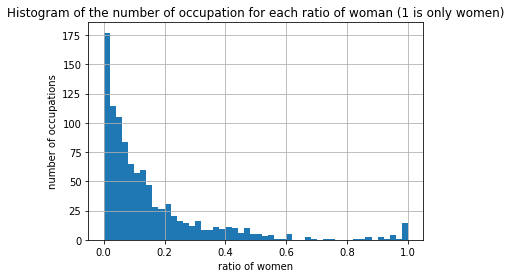

In [76]:
merge_others(d['culture'])
d['occupation']['Total'] = d['occupation'][['female', 'male', 'others']].sum(axis=1, numeric_only =True)
d['occupation']['ratio_w'] = d['occupation']['female'].div(d['occupation']['Total'])

#only taking top 1000 since there are a lot of professions with only a few people doing it so the numbers would not be significant

a = d['occupation'].sort_values('Total', ascending=False).head(1000)

a.sort_values('ratio_w', ascending=False, inplace=True)
bins = pd.cut(a['ratio_w'],100)
a['ratio_w'].hist(bins=50)
plt.xlabel('ratio of women')
plt.ylabel('number of occupations')
plt.title('Histogram of the number of occupation for each ratio of woman (1 is only women)')

In [77]:
#200 most frequent occupations

groups={'Politics':['member of parliament','politician','diplomat'], 
        'Sports':['racecar driver','mountaineer','curler','long-distance runner','figure skater','marathon runner',
                  'cross-country skier','jockey','mixed martial artist','Gaelic football player','table tennis player',
                  'rikishi','head coach','sports coach','professional wrestler','yacht racer','musher','water polo player',
                  'aviator','speed skater','hurler','ski jumper','association football manager','disc jockey','biathlete',
                  'judoka','alpine skier','sport shooter','motorcycle racer','sprinter','field hockey player',
                  'association football referee','racing driver','fencer','golfer','badminton player','basketball coach',
                  'amateur wrestler','handball player','rower','tennis player','rugby league player','volleyball player',
                  'boxer','swimmer','Australian-rules footballer','sportsperson','rugby union player','bicycle racer',
                  'gridiron football player','association football player','basketball player','baseball player',
                  'athletics competitor','ice hockey player','cricketer'],
        'Movie industry':['director','film editor','television actor','cinematographer','film actor','film producer',
                          'actor','film director','screenwriter'],
        'Music':['bandleader','drummer','saxophonist','violinist','organist','rapper','guitarist','record producer',
                 'songwriter','musicologist','pianist','opera singer','jazz musician','singer-songwriter','singer', 
                 'composer','musician','conductor'],
        'Entertainment':['animator','television producer','fashion designer','television director','presenter',
                         'comics artist','comedian','pornographic actor','theatre director','AV idol','announcer',
                         'radio host','illustrator','chess player','voice actor','playwright','model','television presenter',
                         'seiyū'],
        'Artists':['cartoonist','engraver','designer','ballet dancer','graphic designer','dancer','choreographer','painter',
                   'mangaka','artist','sculptor','photographer'],
        'Law & Economics':['jurist','economist','lawyer','judge'],
        'litterature':['contributing editor','literary historian','archivist','editor','essayist','autobiographer',
                       'librarian','publisher','writer','journalist','poet','author','novelist'],
        'Science':['statistician','naturalist','biochemist','ornithologist','inventor','geologist','entomologist',
                   'scientist','zoologist','computer scientist','biologist','astronomer','chemist','physicist',
                   'botanist','mathematician'],
        'Social Science':['political scientist','psychiatrist','sociologist','psychologist','anthropologist'],
        'religion':['monk','presbyter','cleric','bishop','Catholic priest','missionary','rabbi','priest','theologian'],
        'Scolars':['historian of modern age','geographer','paleontologist','explorer','art historian','archaeologist',
                   'historian','philosopher'],
        'higher skills jobs':['audio engineer','civil engineer','surgeon','architect','engineer','physician'],
        'education':['university professor','professor','teacher','music educator','educationist'],
        'Law enforcement & military':['samurai','police officer','military personnel','soldier','officer'],
        'language':['classical philologist','philologist','Esperantist','linguist','translator'],
        'Buisness':['merchant','private sector banker','businessperson','entrepreneur'],
        
       }

In [78]:
b = d['occupation'].sort_values('Total', ascending=False).head(200)
b['Unnamed: 0'].values.tolist()

['politician',
 'association football player',
 'actor',
 'writer',
 'painter',
 'journalist',
 'singer',
 'composer',
 'priest',
 'lawyer',
 'baseball player',
 'poet',
 'historian',
 'athletics competitor',
 'film director',
 'screenwriter',
 'architect',
 'ice hockey player',
 'cricketer',
 'author',
 'diplomat',
 'musician',
 'engineer',
 'basketball player',
 'gridiron football player',
 'bicycle racer',
 'sculptor',
 'officer',
 'novelist',
 'rugby union player',
 'judge',
 'physician',
 'photographer',
 'theologian',
 'economist',
 'sportsperson',
 'conductor',
 'jurist',
 'mathematician',
 'Australian-rules footballer',
 'philosopher',
 'artist',
 'translator',
 'botanist',
 'film producer',
 'physicist',
 'singer-songwriter',
 'entrepreneur',
 'jazz musician',
 'swimmer',
 'television presenter',
 'linguist',
 'boxer',
 'volleyball player',
 'rugby league player',
 'seiyū',
 'opera singer',
 'chemist',
 'tennis player',
 'music educator',
 'educationist',
 'model',
 'rower',
 

In [79]:
def return_category(x, dic):
    for key, vals in dic.items():
        if x in vals:
            return key
       
    return 'others'

In [80]:
b['category'] = b['Unnamed: 0'].apply((lambda x: return_category(x, groups)))
b

,Unnamed: 0,female,male,others,Total,ratio_w,category
3595,politician,26801.0,239146.0,11.0,265958.0,0.100772,Politics
973,association football player,6500.0,185241.0,1.0,191742.0,0.033900,Sports
2609,actor,59987.0,78276.0,54.0,138317.0,0.433692,Movie industry
3547,writer,17595.0,65914.0,15.0,83524.0,0.210658,litterature
91,painter,9060.0,60350.0,5.0,69415.0,0.130519,Artists
1357,journalist,12195.0,47478.0,4.0,59677.0,0.204350,litterature
194,singer,21458.0,23355.0,21.0,44834.0,0.478610,Music
2737,composer,4259.0,37720.0,2.0,41981.0,0.101451,Music
3596,priest,172.0,27488.0,1.0,27661.0,0.006218,religion
170,lawyer,2102.0,25404.0,4.0,27510.0,0.076409,Law & Economics


In [81]:
categories['ratio_w'].plot.barh()

NameError: name 'categories' is not defined